In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tikzplotlib
import os

import scipy.stats as st

In [2]:
scratchHPC = r'\\rb-hpc.de.bosch.com\hro7rng\scratch\MultiPhase'

In [10]:
StudienOrdner = r'U:\Results\Aufloesungsstudie_fix_averagin radius\_eval_4mu'
#StudienOrdner = os.path.join(scratchHPC, StudienOrdner)

ImageOrdner = r'_image'
ImageOrdner = os.path.join(StudienOrdner, ImageOrdner)
if not os.path.isdir(ImageOrdner):
    os.mkdir(ImageOrdner)

In [4]:
#StudienOrdner = r'C:\Users\hro7rng\Documents\Downtime_Oktober\Aufloesungsstudie'

In [11]:
lf_csv = r'lifetime.csv'
lf_csv = os.path.join(StudienOrdner, lf_csv)

In [12]:
df_lf = pd.read_csv(lf_csv)

In [13]:
ll_volf = df_lf['ModelName'].tolist()
ll_volf = [float(kk[kk.rfind('_')+15:])   for kk in ll_volf]

ll_Seed = df_lf['ModelName'].tolist()
ll_Seed = [str(kk[kk.find('_')+5:kk.find('Resol')-1])   for kk in ll_Seed]

ll_resol = df_lf['ModelName'].tolist()
ll_resol = [str(kk[kk.find('Resol')+5:kk.find('Volume')-1])   for kk in ll_resol]

In [14]:
df_lf['Volume_Martensite'] = ll_volf
df_lf['Seed'] = ll_Seed
df_lf['Resolution'] = ll_resol

df_wholMod = df_lf[df_lf['Phase']=='wholeMod']

In [15]:
ll_seed = np.unique(ll_Seed)
ll_vols_u = np.unique(ll_volf)
ll_vols_u = [kk for kk in reversed(ll_vols_u)]
ll_Ferritanteil = [100 - kk for kk in ll_vols_u ]

In [16]:
df_32 = df_wholMod[df_wholMod['Resolution']=='32']
df_64 = df_wholMod[df_wholMod['Resolution']=='64']
df_128 = df_wholMod[df_wholMod['Resolution']=='128']

In [17]:
dic_err_32_64_aver = {}
dic_err_64_128_aver = {}
dic_err_32_128_aver = {}

dic_err_32_64_loc = {}
dic_err_64_128_loc = {}
dic_err_32_128_loc = {}

for Seed in ll_seed:
    errorlist_low = []
    errorlist_mid = []
    errorlist_high = []
    for vols in ll_vols_u:
        low_av = df_32[(df_32['Volume_Martensite'] == vols) & (df_32['Seed'] == Seed)]['FIPmax'].values[0]
        mid_av = df_64[(df_64['Volume_Martensite'] == vols) & (df_64['Seed'] == Seed)]['FIPmax'].values[0]
        high_av = df_128[(df_128['Volume_Martensite'] == vols) & (df_128['Seed'] == Seed)]['FIPmax'].values[0]
        
    
        err_low = abs(mid_av-low_av)/mid_av
        err_mid = abs(high_av-mid_av)/high_av
        err_high = abs(high_av-low_av)/high_av
        errorlist_low.append(err_low)
        errorlist_mid.append(err_mid)
        errorlist_high.append(err_high)
        
    dic_err_32_64_aver[Seed] = errorlist_low
    dic_err_64_128_aver[Seed] = errorlist_mid
    dic_err_32_128_aver[Seed] = errorlist_high
    
    
    errorlist_low = []
    errorlist_mid = []
    errorlist_high = []
    
    for vols in ll_vols_u:
        low_loc = df_32[(df_32['Volume_Martensite'] == vols) & (df_32['Seed'] == Seed)]['FIPmaxLocal'].values[0]
        mid_loc = df_64[(df_64['Volume_Martensite'] == vols) & (df_64['Seed'] == Seed)]['FIPmaxLocal'].values[0]
        high_loc = df_128[(df_128['Volume_Martensite'] == vols) & (df_128['Seed'] == Seed)]['FIPmaxLocal'].values[0]
        
        err_low = abs(mid_loc-low_loc)/mid_loc
        err_mid = abs(high_loc-mid_loc)/high_loc
        err_high = abs(high_loc-low_loc)/high_loc
        errorlist_low.append(err_low)
        errorlist_mid.append(err_mid)
        errorlist_high.append(err_high)
    
    dic_err_32_64_loc[Seed] = errorlist_low
    dic_err_64_128_loc[Seed] = errorlist_mid
    dic_err_32_128_loc[Seed] = errorlist_high

In [18]:
dic_dic_err = [dic_err_32_64_aver, dic_err_64_128_aver, dic_err_32_128_aver, dic_err_32_64_loc, dic_err_64_128_loc, dic_err_32_128_loc]

for dd in dic_dic_err:
    mean_ll = []
    for num, vols in enumerate(ll_vols_u):
        m_list = []

        for key, item in dd.items():
            if key != 'MeanSeeds':
                m_list.append(item[num])
        mean = np.mean(m_list)
        mean_ll.append(mean)
    dd['MeanSeeds'] = mean_ll


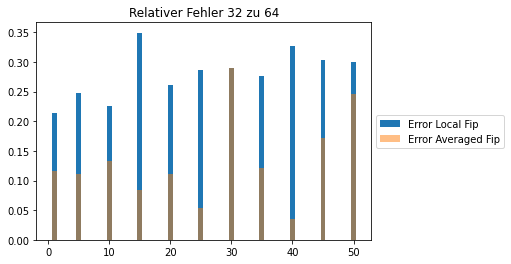

In [20]:
plt.bar(ll_Ferritanteil, dic_dic_err[3]['MeanSeeds'], label='Error Local Fip')
plt.bar(ll_Ferritanteil, dic_dic_err[0]['MeanSeeds'], label='Error Averaged Fip', alpha=.5)
plt.title('Relativer Fehler 32 zu 64')


plt.legend(loc='lower left' ,bbox_to_anchor=(1.0, 0.4))#, ncol=2)
tikzplotlib.save(os.path.join(ImageOrdner, 'Relative_error_32_64.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Relative_error_32_64.png'), bbox_inches='tight', dpi=150, transparent=True)

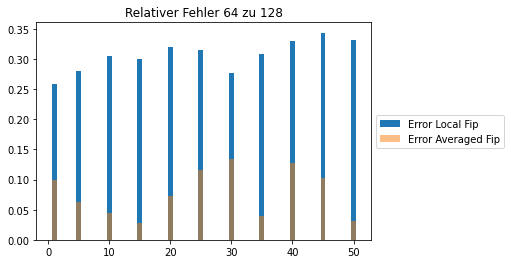

In [21]:
plt.bar(ll_Ferritanteil, dic_dic_err[4]['MeanSeeds'], label='Error Local Fip')
plt.bar(ll_Ferritanteil, dic_dic_err[1]['MeanSeeds'], label='Error Averaged Fip', alpha=.5)
plt.title('Relativer Fehler 64 zu 128')


plt.legend(loc='lower left' ,bbox_to_anchor=(1.0, 0.4))#, ncol=2)
tikzplotlib.save(os.path.join(ImageOrdner, 'Relative_error_64_128.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Relative_error_64_128.png'), bbox_inches='tight', dpi=150, transparent=True)

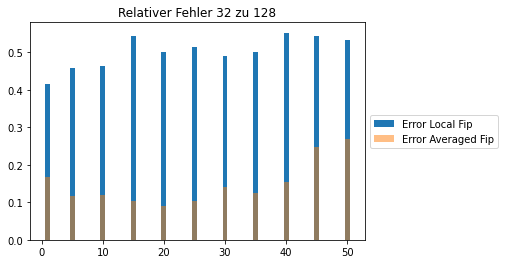

In [22]:
plt.bar(ll_Ferritanteil, dic_dic_err[5]['MeanSeeds'], label='Error Local Fip')
plt.bar(ll_Ferritanteil, dic_dic_err[2]['MeanSeeds'], label='Error Averaged Fip', alpha=.5)
plt.title('Relativer Fehler 32 zu 128')



plt.legend(loc='lower left' ,bbox_to_anchor=(1.0, 0.4))#, ncol=2)
tikzplotlib.save(os.path.join(ImageOrdner, 'Relative_error_32_128.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Relative_error_32_128.png'), bbox_inches='tight', dpi=150, transparent=True)

    Following confidence intervall 

In [23]:
res_un = ['32','64','128']


In [24]:
df_confidence = pd.DataFrame()

In [25]:
res_dic_ll = [df_32, df_64, df_128]
for numr, res in enumerate(res_dic_ll):
    r_ll =[]
    for vol in ll_vols_u:
        
        df_vol = res[res['Volume_Martensite']== vol]
        a = df_vol['FIPmax'].tolist()
        mean = np.mean(a)
        al_bound, au_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        v_ll = (al_bound, mean, au_bound)
        r_ll.append(v_ll)
    
    df_confidence[str(res_un[numr]+'_averaged')] = r_ll
    
    r_ll =[]
    for vol in ll_vols_u:
        
        df_vol = res[res['Volume_Martensite']== vol]
        a = df_vol['FIPmaxLocal'].tolist()
        mean = np.mean(a)
        al_bound, au_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        v_ll = (al_bound, mean, au_bound)
        r_ll.append(v_ll)
    
    df_confidence[str(res_un[numr]+'_local')] = r_ll

In [26]:
df_confidence.index = ll_Ferritanteil

In [27]:
#df_confidence

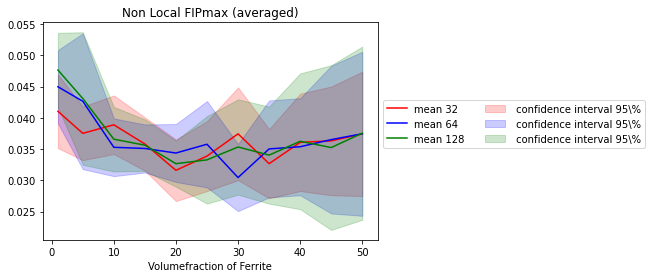

In [28]:
ll_color = ['r', 'b', 'g']
for num, res in enumerate(res_un):
    plt.plot(ll_Ferritanteil,[tp[1] for tp in df_confidence[str(res)+'_averaged'].tolist()], label= ('mean ' + str(res)), color=ll_color[num])
    plt.fill_between(ll_Ferritanteil, [tp[0] for tp in df_confidence[str(res)+'_averaged'].tolist()], [tp[2] for tp in df_confidence[str(res)+'_averaged'].tolist()], color=ll_color[num], alpha=.2, label=' confidence interval 95\%')

plt.title('Non Local FIPmax (averaged)')

plt.xlabel('Volumefraction of Ferrite')
#plt.show()
plt.legend(loc='lower left' ,bbox_to_anchor=(1.0, 0.4), ncol=2)
tikzplotlib.save(os.path.join(ImageOrdner, 'FIPMAXESaver_confidence.tex'))

plt.savefig(os.path.join(ImageOrdner, 'FIPMAXESaver_confidence.png'), bbox_inches='tight', dpi=150, transparent=True)

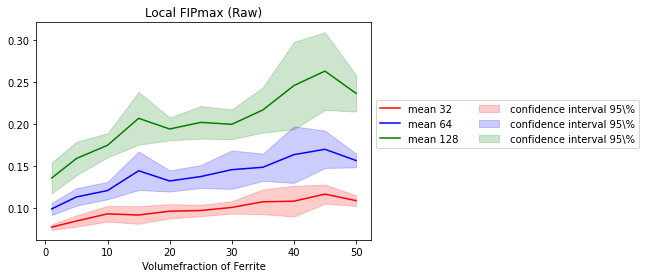

In [31]:
ll_color = ['r', 'b', 'g']
for num, res in enumerate(res_un):
    plt.plot(ll_Ferritanteil,[tp[1] for tp in df_confidence[str(res)+'_local'].tolist()], label= ('mean ' + str(res)), color=ll_color[num])
    plt.fill_between(ll_Ferritanteil, [tp[0] for tp in df_confidence[str(res)+'_local'].tolist()], [tp[2] for tp in df_confidence[str(res)+'_local'].tolist()], color=ll_color[num], alpha=.2, label=' confidence interval 95\%')

plt.title('Local FIPmax (Raw)')

plt.xlabel('Volumefraction of Ferrite')
#plt.show()
plt.legend(loc='lower left' ,bbox_to_anchor=(1.0, 0.4), ncol=2)

tikzplotlib.save(os.path.join(ImageOrdner, 'FIPMAXESLocal_confidence.tex'))
plt.savefig(os.path.join(ImageOrdner, 'FIPMAXESLocal_confidence.png'), bbox_inches='tight', dpi=150, transparent=True)

In [36]:
def hhs():
    return None, None

In [42]:
gg, di = hhs()

In [44]:
print(gg)

None


In [46]:
import time

In [49]:
time.

time.struct_time(tm_year=2021, tm_mon=11, tm_mday=16, tm_hour=17, tm_min=12, tm_sec=52, tm_wday=1, tm_yday=320, tm_isdst=0)